## Sales Analysis

In [2]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

#### Merging 12 months of sales data into a single file

In [6]:
final_data = pd.DataFrame()
files = [file for file in os.listdir('../Sales Analysis/') if file.endswith('.csv')]
for file in files:
    file_path = os.path.join('../Sales Analysis/', file)
    df = pd.read_csv(file_path)
    final_data = pd.concat([final_data,df])
final_data.to_csv('final_data.csv',index=False)

#### Reading updated dataframe

In [247]:
df = pd.read_csv('./final_data.csv')

In [248]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Cleaning Up Data

In [250]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [251]:
len(df)

186850

In [252]:
# These are the rows which contain null values for each column
df[df.isnull().all(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


#### Therefore we will have to drop these unnecessary rows

In [253]:
df = df.dropna(how='all')

In [254]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [255]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Now we will create a new column 'month' which we will extract from 'Order Date' column using pd.to_datetime() function

In [256]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['month'] = df['Order Date'].dt.month

In [257]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0


### Let's determine which month had the highest sales.

#### To determine sales we'll have to create a new column called 'Sales'

In [258]:
#Converting all required columns of string format to numeric
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186305 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          186305 non-null  object        
 1   Product           186305 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  186305 non-null  object        
 6   month             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 11.4+ MB


In [260]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']

In [261]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95


In [262]:
# Sales of each month
results = df.groupby('month')[['Quantity Ordered','Sales']].sum()

Text(0.5, 1.0, 'Sales vs Month')

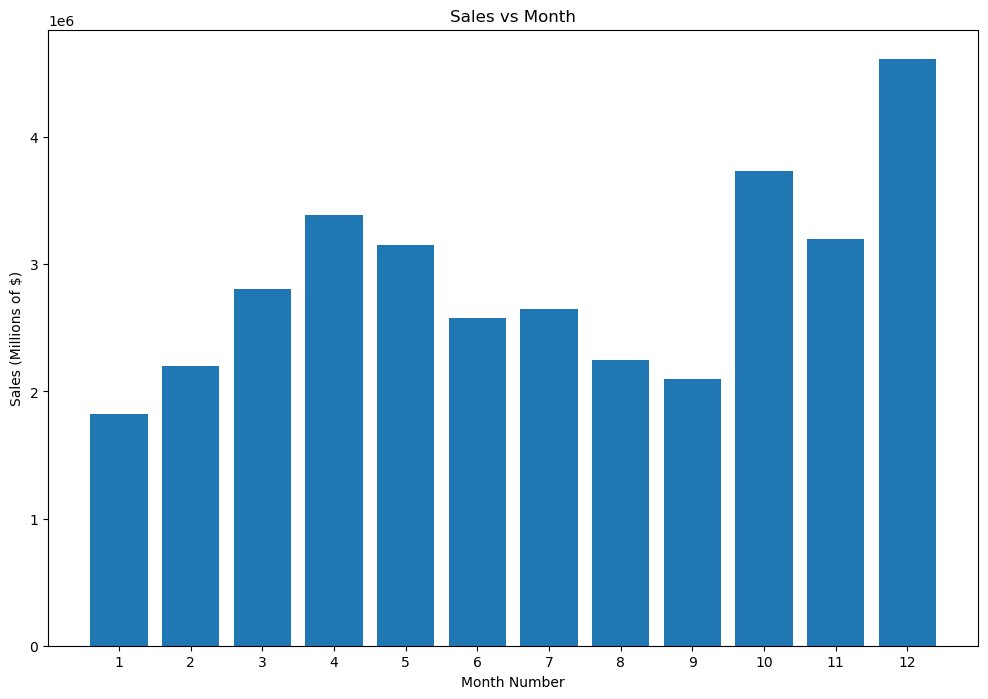

In [263]:
plt.figure(figsize=(12,8))
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales (Millions of $)')
plt.title('Sales vs Month')

### Let's determine which city had the highest sales.

#### For this we will have to extract city names from 'Purchase Address' column

In [265]:
# We will do this using .apply() method
def extract_city(address):
    parts = address.split(',')
    if len(parts) > 1:
        return parts[1].strip() 
    return None
    
df['City'] = df['Purchase Address'].apply(extract_city)

df = df.dropna()

In [266]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta


In [270]:
results = df.groupby('City')[['Quantity Ordered','Sales']].sum()

In [275]:
df['City'].nunique()

9

In [271]:
results

,Quantity Ordered,Sales
City,,
Atlanta,16602.0,2795498.58
Austin,11153.0,1819581.75
Boston,22528.0,3661642.01
Dallas,16730.0,2767975.40
Los Angeles,33289.0,5452570.80
New York City,27932.0,4664317.43
Portland,14053.0,2320490.61
San Francisco,50239.0,8262203.91
Seattle,16553.0,2747755.48


Text(0.5, 1.0, 'Sales vs City')

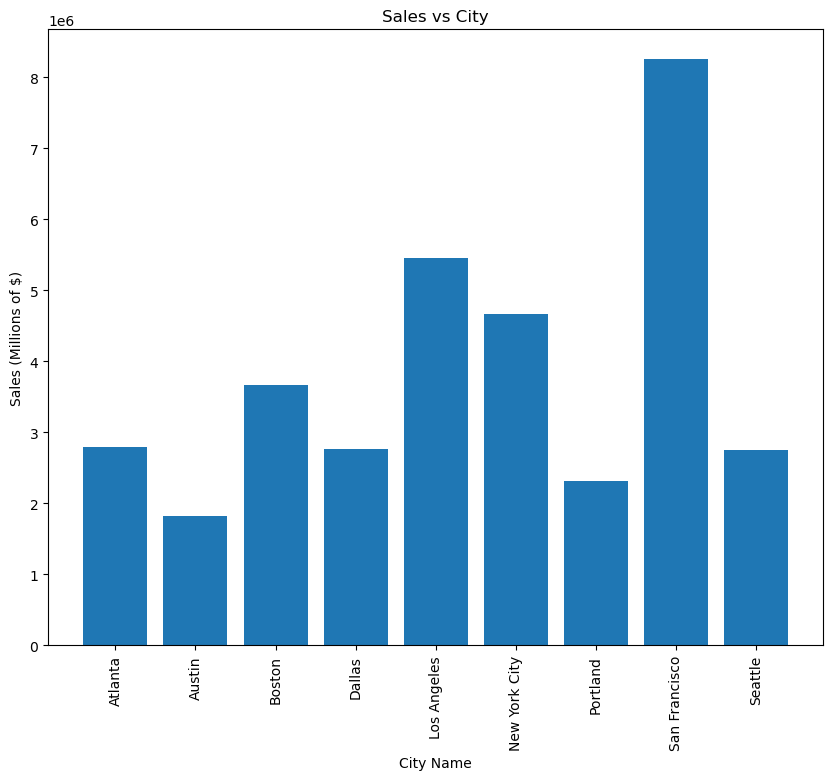

In [282]:
plt.figure(figsize=(10,8))
city = [city for city,df in df.groupby('City')]
plt.bar(city,results['Sales'])
plt.xticks(city,rotation='vertical')
plt.xlabel('City Name')
plt.ylabel('Sales (Millions of $)')
plt.title('Sales vs City')


#### What time should we display advertisements to maximise likelihood of customers buying products?

For this, we will have to create a new columns called 'Hours' and 'Minutes' which will be extracted from 'Order Date' column

In [284]:
df['Hours'] = df['Order Date'].dt.hour

In [288]:
df['Minutes'] = df['Order Date'].dt.minute

In [289]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hours,Minutes
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0,1
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18,21
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12,38


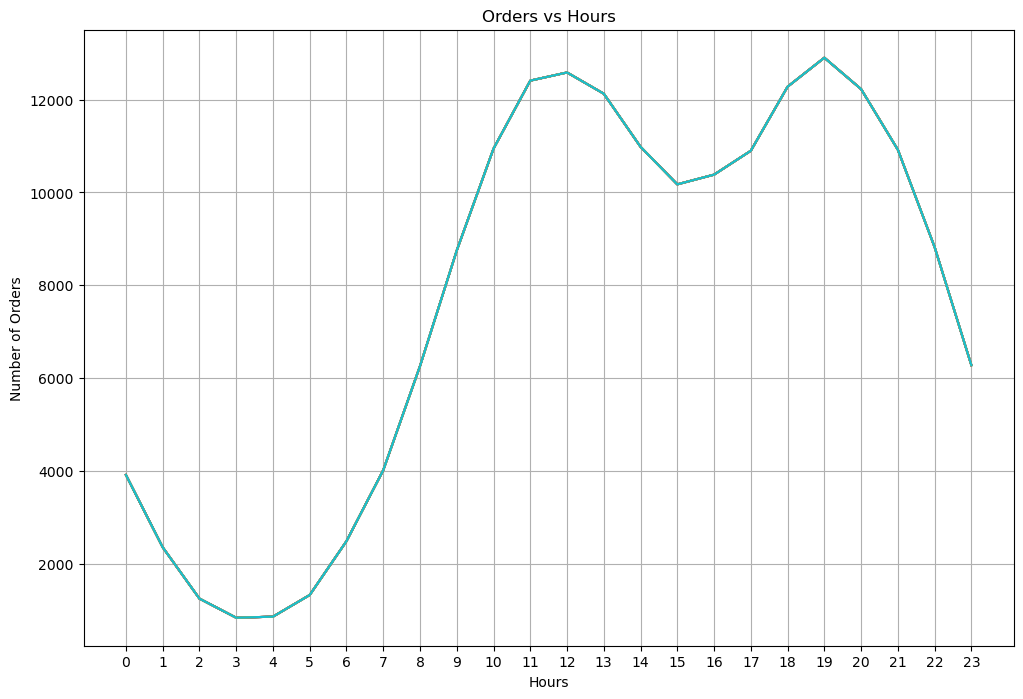

In [298]:
plt.figure(figsize=(12,8))
hour = [hour for hour,df in df.groupby('Hours')]
plt.plot(hour,df.groupby(['Hours']).count())
plt.xticks(hour)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.title('Orders vs Hours')
plt.grid()
plt.show()

#my recommendation is around 11am and 7pm

### What products are most often sold together?

In [301]:
 # For this we'll have tocreate a separate dataframe for items havind same Order ID
new_df = df[df['Order ID'].duplicated(keep=False)]

In [303]:
new_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hours,Minutes
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,600.00,Boston,12,37
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.95,Boston,12,37


In [306]:
new_df['Grouped'] = new_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hours,Minutes,Grouped
16,295681,Google Phone,1.0,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,600.00,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1.0,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.95,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1.0,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,99.99,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1.0,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12.0,11.99,Boston,12,37,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1.0,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12.0,400.00,New York City,14,32,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1.0,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6.0,3.84,Los Angeles,11,37,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,Google Phone,1.0,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6.0,600.00,New York City,12,6,"Google Phone,USB-C Charging Cable"
186823,222884,USB-C Charging Cable,1.0,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6.0,11.95,New York City,12,6,"Google Phone,USB-C Charging Cable"
186842,222903,iPhone,1.0,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6.0,700.00,New York City,22,21,"iPhone,Lightning Charging Cable"


In [311]:
new_df = new_df[['Order ID','Grouped']].drop_duplicates()

In [313]:
new_df

,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [317]:
#The code counts how frequently each pair of items occurs across all rows in the 'Grouped' column.

from itertools import combinations
from collections import Counter

count = Counter()

for row in new_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product is sold most?

In [325]:
product_group = df.drop(['Order Date','Order ID','Purchase Address','City'],axis=1).groupby('Product')
quantity = product_group.sum()['Quantity Ordered']

In [326]:
quantity

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

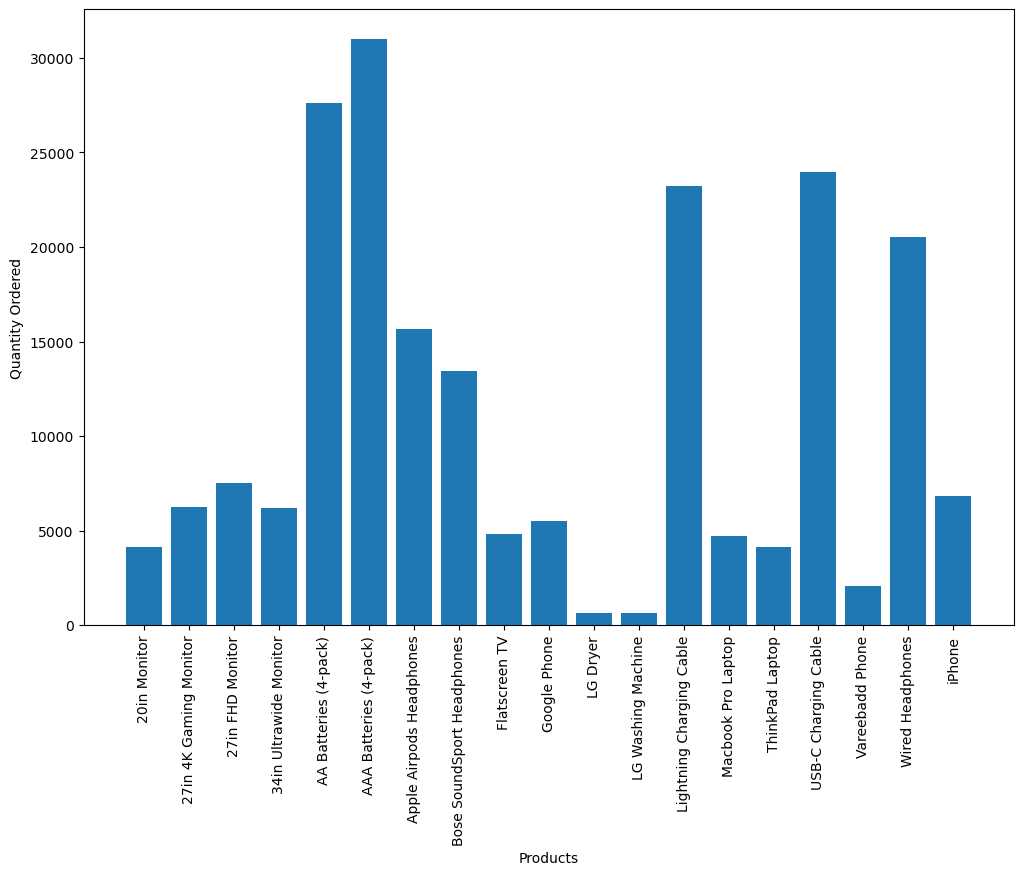

In [332]:
plt.figure(figsize=(12,8))
products = [product for product,df in product_group]
plt.bar(products,quantity)
plt.xticks(products,rotation=90)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()

In [346]:
temp_df = df.copy()
temp_df['Price Each'] = pd.to_numeric(temp_df['Price Each'],errors='coerce')

In [347]:
temp_df['Price Each'].isnull().sum()

0

In [352]:
prices = temp_df.drop(['Order ID','City','Purchase Address'],axis=1).groupby('Product').mean()['Price Each']

In [353]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

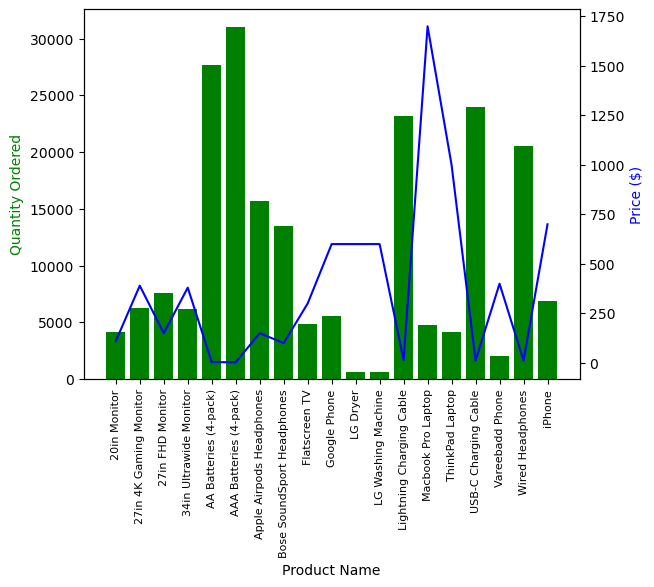

In [356]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

<h1>Conclusion</h1>
The sales analysis provided several key insights into the sales performance of electronic items:

<strong>Best Month for Sales:</strong> December was the best month for sales, highlighting the impact of holiday shopping on revenue.<br>


<strong>Top Selling City:</strong> San Francisco emerged as the city with the highest sales, indicating a strong market presence in this region.<br>


<strong>Optimal Advertisement Timing:</strong> Advertisements displayed around 11 AM and 7 PM are likely to be most effective, aligning with peak customer activity times.<br>


<strong>Frequently Sold Together Products:</strong> Products such as the iPhone paired with the Lightning Charging Cable and Google Phone with the USB-C Charging Cable were frequently purchased together, suggesting opportunities for bundling promotions.<br>


<strong>Top Selling Products:</strong> The AAA Batteries (4-pack), AA Batteries (4-pack), and USB-C Charging Cable were the most sold items, likely due to their high demand and frequent need for replacement.<br>


These findings provide actionable insights that can guide marketing strategies, improve inventory management, and optimize product bundling, ultimately enhancing overall sales performance.